In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Read Original Image (Color)
original = cv2.imread("MSD.jpg")

if original is None:
    raise ValueError("Image not found! Please check the path.")

In [3]:
# 2. Convert to Grayscale
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [7]:
# 3. Brightness Improvement
brightness_increase = cv2.convertScaleAbs(gray, alpha=1, beta=50)

In [9]:
# 4. Brightness Reduction
brightness_decrease = cv2.convertScaleAbs(gray, alpha=1, beta=-50)

In [11]:
# 5. Thresholding (Binary)
_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [13]:
# 6. Negative Transformation
negative = 255 - gray

In [15]:
# 7. Log Transformation
c = 255 / np.log(1 + np.max(gray))
log_transformed = c * np.log(1 + gray)
log_transformed = np.array(log_transformed, dtype=np.uint8)

C:\Users\pm045\AppData\Local\Temp\ipykernel_49116\3331002722.py:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + gray)
C:\Users\pm045\AppData\Local\Temp\ipykernel_49116\3331002722.py:4: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype=np.uint8)


In [17]:
# 8. Power Law (Gamma) Transformation
gamma = 0.5   # gamma < 1 for brighter, > 1 for darker
gamma_corrected = np.array(255 * (gray / 255) ** gamma, dtype=np.uint8)


In [19]:
titles = ['Original (Color)', 'Gray Scale', 'Brightness +', 'Brightness -',
          'Thresholding', 'Negative', 'Log Transform', 'Power Law (Gamma)']

images = [cv2.cvtColor(original, cv2.COLOR_BGR2RGB), gray, brightness_increase, brightness_decrease,
          thresholded, negative, log_transformed, gamma_corrected]


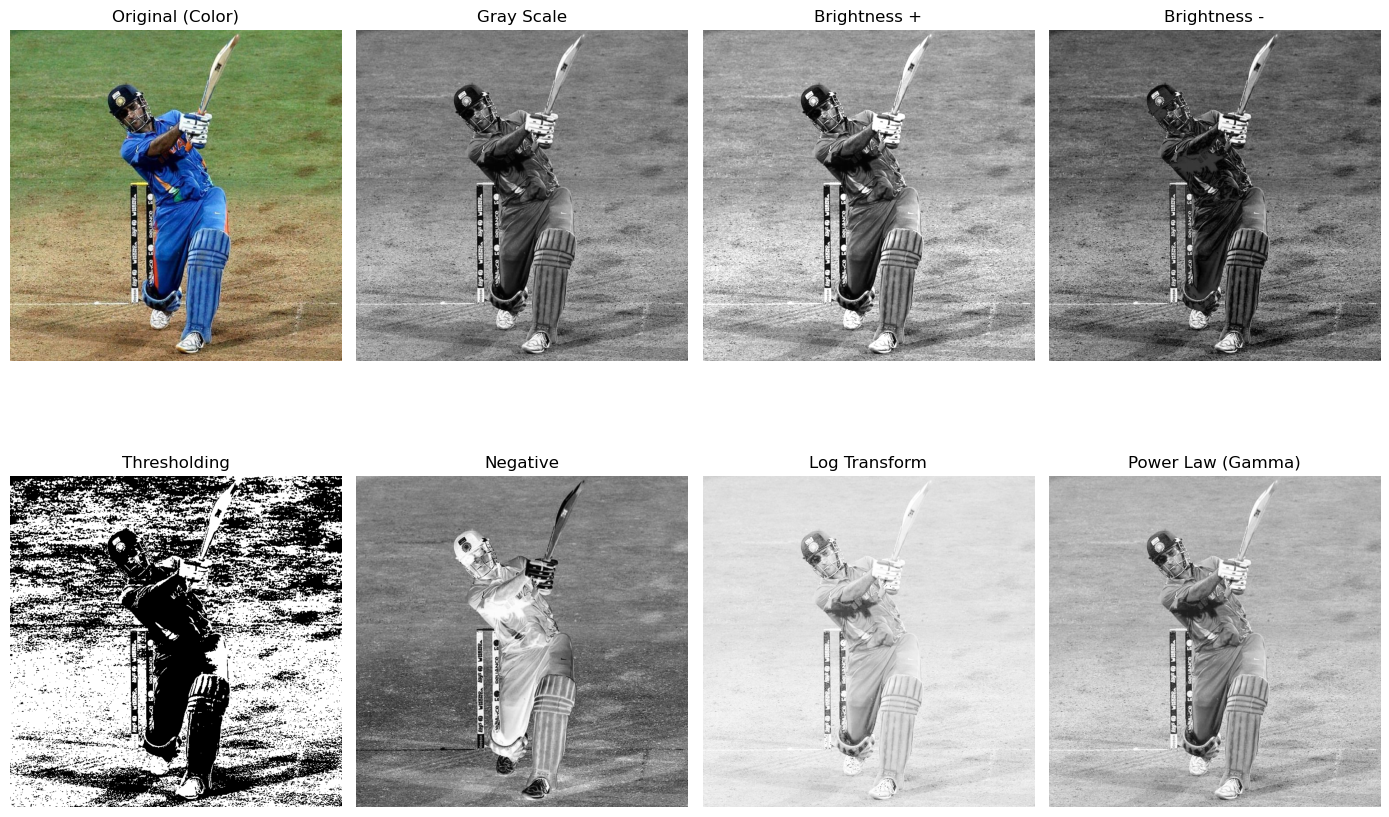

In [21]:
plt.figure(figsize=(14, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    if i == 0:   # show original in RGB
        plt.imshow(images[i])
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()